In [1]:
import os
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime as dt
import load_data as ld
import alpaca_trade_api as tradeapi
import MC_simulation as mc

#%matplotlib inline

In [5]:
curr_year =dt.datetime.now().year

start_date = pd.Timestamp(str(curr_year)+'-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp(str(curr_year)+'-01-01', tz='America/New_York').isoformat()
start_date

'2022-01-01T00:00:00-05:00'

In [2]:
tickers_crypto = ['BTC-USD', 'ETH-USD']
tickers=['SPY','VTWO', 'IYW', 'QQQ']
num_of_years_of_data =3
num_of_years_of_projection = 2

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
_______________________________________
Summary statistics from the simulations
_______________________________________
count           100.000000
mean              1.629089
std               0.396261
min               0.903052
25%               1.371219
50%               1.580472
75%               1.852993
max               2.799844
95% CI Lower      0.969029
95% CI Upper      2.502726
Name: 504, dtype: float64
_______________________________________________________________________________________________________
For a Portfolio consisting of ['BTC-USD', 'ETH-USD', 'SPY', '

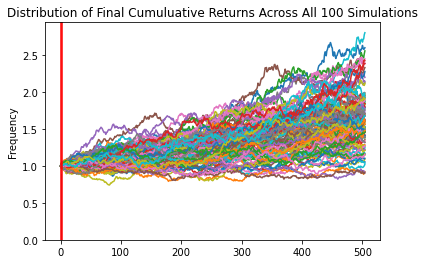

In [3]:
mc.run_montecarlo(tickers_crypto, tickers, num_of_years_of_data, num_of_years_of_projection)


In [ ]:
run_montecarlo(tickers_crypto, tickers, num_of_years_of_data, num_of_years_of_projection):


In [2]:
load_dotenv('my_api.env')

True

In [3]:
os.getcwd()

'/Users/ashokpandey/Desktop/Fintech-Workspace/Project 1/ashok branch'

In [4]:
os.getenv('ALPACA_API_KEY')

'PKSYV8TUR5L9XAGR5AHC'

In [5]:
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE
alpaca_rest_obj = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

In [24]:
t=dt.datetime.now().year
type(t)

int

In [6]:
start = dt.datetime(2019, 1, 1)
end = dt.datetime(2022, 1, 1)
#tickers=['BTC-USD','SPY','VTWO', 'IYW', 'QQQ']
tickers=['BTC-USD', 'ETH-USD']


TypeError: unsupported operand type(s) for -: 'datetime.datetime' and 'int'

In [7]:
#LOAD FROM YAHOO
p_yahoo=ld.load_from_yahoo(tickers, start,end)

In [8]:
#LOAD FROM ALPACA
tickers=['SPY','VTWO', 'IYW', 'QQQ']
#tickers=['SPY']
start_date = pd.Timestamp('2019-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-01', tz='America/New_York').isoformat()

p_alpaca=ld.load_from_alpaca(tickers, start_date,end_date)

In [9]:
#JOIN THE TWO DATAFRAMES - need to fix TIMESTAMP index and make it same as in p_yahoo
p_alpaca.head()

SPY                                                             \
              open    high     low   close     volume trade_count        vwap   
2019-01-02  246.06  251.21  245.95  250.18  131471311      603608  249.117597   
2019-01-03  248.30  248.57  243.67  244.21  146803492      698037  245.630362   
2019-01-04  247.59  253.11  247.17  252.39  142920211      708777  250.455694   
2019-01-07  252.76  255.95  251.69  254.38  103705813      449998  254.069565   
2019-01-08  256.86  257.31  254.00  256.77  103267687      461977  255.845300   

              VTWO                    ...     IYW                          \
              open      high     low  ...  volume trade_count        vwap   
2019-01-02  106.09  108.4750  105.66  ...  220201        1324  159.799314   
2019-01-03  107.50  108.0100  105.72  ...  327464        1921  153.906994   
2019-01-04  107.50  110.3900  107.44  ...  238948        2060  158.991730   
2019-01-07  110.27  112.6206  109.79  ...  223908        1474  161.034602   
2019-01-08  112.97  113.8300  112.00  ...  166340        1168  162.458109   

               QQQ                                                            
              open    high     low   close    volume trade_count        vwap  
2019-01-02  150.99  155.75  150.88  154.88  58726672      278592  153.791088  
2019-01-03  152.60  153.26  149.49  149.82  75139650      353109  151.221145  
2019-01-04  152.34  157.00  151.74  156.23  75057350      338428  154.991967  
2019-01-07  156.62  158.86  156.11  158.09  52059489      213721  157.482959  
2019-01-08  159.54  160.11  157.20  159.52  49388754      222519  158.896980  

[5 rows x 28 columns]

In [10]:
portfolio = pd.concat([p_yahoo, p_alpaca], axis=1).dropna()
portfolio

BTC-USD                                            \
                    high           low          open         close   
2019-01-02   3947.981201   3817.409424   3849.216309   3943.409424   
2019-01-03   3935.685059   3826.222900   3931.048584   3836.741211   
2019-01-04   3865.934570   3783.853760   3832.040039   3857.717529   
2019-01-07   4092.613525   4020.894043   4078.584961   4025.248291   
2019-01-08   4109.020996   3996.955322   4028.472168   4030.847900   
...                  ...           ...           ...           ...   
2021-12-27  51956.328125  50499.468750  50802.609375  50640.417969   
2021-12-28  50679.859375  47414.210938  50679.859375  47588.855469   
2021-12-29  48119.742188  46201.496094  47623.871094  46444.710938   
2021-12-30  47879.964844  46060.312500  46490.605469  47178.125000   
2021-12-31  48472.527344  45819.953125  47169.371094  46306.445312   

                                           ETH-USD                            \
                 volume     adj close         high          low         open   
2019-01-02   5244856836   3943.409424   156.929138   140.650955   141.519516   
2019-01-03   4530215219   3836.741211   155.863052   147.198364   155.196045   
2019-01-04   4847965467   3857.717529   156.878983   147.907104   148.912888   
2019-01-07   5228625637   4025.248291   158.450424   151.150726   157.809494   
2019-01-08   5306593305   4030.847900   153.625778   148.669540   151.967545   
...                 ...           ...          ...          ...          ...   
2021-12-27  24324345758  50640.417969  4126.001465  4033.492432  4064.746338   
2021-12-28  33430376883  47588.855469  4037.538086  3769.280029  4037.538086   
2021-12-29  30049226299  46444.710938  3827.981934  3612.795898  3797.436279   
2021-12-30  26686491018  47178.125000  3767.559814  3595.204834  3632.219727   
2021-12-31  36974172400  46306.445312  3807.288818  3636.869873  3713.430176   

                         ...       IYW                             QQQ  \
                  close  ...    volume trade_count        vwap    open   
2019-01-02   155.047684  ...  220201.0      1324.0  159.799314  150.99   
2019-01-03   149.135010  ...  327464.0      1921.0  153.906994  152.60   
2019-01-04   154.581940  ...  238948.0      2060.0  158.991730  152.34   
2019-01-07   151.699219  ...  223908.0      1474.0  161.034602  156.62   
2019-01-08   150.359634  ...  166340.0      1168.0  162.458109  159.54   
...                 ...  ...       ...         ...         ...     ...   
2021-12-27  4037.547607  ...  574946.0      3956.0  116.632669  398.24   
2021-12-28  3800.893066  ...  565839.0      3944.0  116.430626  404.50   
2021-12-29  3628.531738  ...  312539.0      3212.0  116.069555  401.88   
2021-12-30  3713.852051  ...  351243.0      3358.0  116.201110  401.45   
2021-12-31  3682.632812  ...  206193.0      2259.0  115.152999  399.71   

                                                                            
                high       low   close      volume trade_count        vwap  
2019-01-02  155.7500  150.8800  154.88  58726672.0    278592.0  153.791088  
2019-01-03  153.2600  149.4900  149.82  75139650.0    353109.0  151.221145  
2019-01-04  157.0000  151.7400  156.23  75057350.0    338428.0  154.991967  
2019-01-07  158.8600  156.1100  158.09  52059489.0    213721.0  157.482959  
2019-01-08  160.1100  157.2000  159.52  49388754.0    222519.0  158.896980  
...              ...       ...     ...         ...         ...         ...  
2021-12-27  403.4800  398.2194  403.48  33201869.0    257997.0  401.677439  
2021-12-28  404.5800  400.7100  401.61  33095203.0    285309.0  402.515937  
2021-12-29  403.0500  399.1100  401.55  32230450.0    247534.0  401.215163  
2021-12-30  403.5699  399.7500  400.35  23847325.0    201835.0  401.883682  
2021-12-31  401.0589  397.3400  397.85  34890081.0    280564.0  398.881205  

[757 rows x 40 columns]

In [11]:
portfolio.head()

BTC-USD                                                     \
                   high          low         open        close      volume   
2019-01-02  3947.981201  3817.409424  3849.216309  3943.409424  5244856836   
2019-01-03  3935.685059  3826.222900  3931.048584  3836.741211  4530215219   
2019-01-04  3865.934570  3783.853760  3832.040039  3857.717529  4847965467   
2019-01-07  4092.613525  4020.894043  4078.584961  4025.248291  5228625637   
2019-01-08  4109.020996  3996.955322  4028.472168  4030.847900  5306593305   

                            ETH-USD                                      ...  \
              adj close        high         low        open       close  ...   
2019-01-02  3943.409424  156.929138  140.650955  141.519516  155.047684  ...   
2019-01-03  3836.741211  155.863052  147.198364  155.196045  149.135010  ...   
2019-01-04  3857.717529  156.878983  147.907104  148.912888  154.581940  ...   
2019-01-07  4025.248291  158.450424  151.150726  157.809494  151.699219  ...   
2019-01-08  4030.847900  153.625778  148.669540  151.967545  150.359634  ...   

                 IYW                             QQQ                          \
              volume trade_count        vwap    open    high     low   close   
2019-01-02  220201.0      1324.0  159.799314  150.99  155.75  150.88  154.88   
2019-01-03  327464.0      1921.0  153.906994  152.60  153.26  149.49  149.82   
2019-01-04  238948.0      2060.0  158.991730  152.34  157.00  151.74  156.23   
2019-01-07  223908.0      1474.0  161.034602  156.62  158.86  156.11  158.09   
2019-01-08  166340.0      1168.0  162.458109  159.54  160.11  157.20  159.52   

                                                
                volume trade_count        vwap  
2019-01-02  58726672.0    278592.0  153.791088  
2019-01-03  75139650.0    353109.0  151.221145  
2019-01-04  75057350.0    338428.0  154.991967  
2019-01-07  52059489.0    213721.0  157.482959  
2019-01-08  49388754.0    222519.0  158.896980  

[5 rows x 40 columns]

In [12]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
#Setup the WEIGHTS ..
# Run 500 samples.
#tickers=['BTC-USD','SPY','VTWO', 'IYW', 'QQQ']

MC_yrs_sim = MCSimulation(
    portfolio_data=portfolio,
    weights=[0.03,.02,.30,.30,.20, .15],
  #  weights=[0.03,.02,.35,.35,.25],
   # weights=[.25,.25,.25,.25],

    #weights=[0.05,.95],
    num_simulation=100,
    num_trading_days=252*2
)
# Review the simulation input data
# YOUR CODE HERE
display(MC_yrs_sim.portfolio_data.tail())

BTC-USD                                            \
                    high           low          open         close   
2021-12-27  51956.328125  50499.468750  50802.609375  50640.417969   
2021-12-28  50679.859375  47414.210938  50679.859375  47588.855469   
2021-12-29  48119.742188  46201.496094  47623.871094  46444.710938   
2021-12-30  47879.964844  46060.312500  46490.605469  47178.125000   
2021-12-31  48472.527344  45819.953125  47169.371094  46306.445312   

                                                        ETH-USD               \
                 volume     adj close daily_return         high          low   
2021-12-27  24324345758  50640.417969    -0.002838  4126.001465  4033.492432   
2021-12-28  33430376883  47588.855469    -0.060259  4037.538086  3769.280029   
2021-12-29  30049226299  46444.710938    -0.024042  3827.981934  3612.795898   
2021-12-30  26686491018  47178.125000     0.015791  3767.559814  3595.204834   
2021-12-31  36974172400  46306.445312    -0.018476  3807.288818  3636.869873   

                         ...         IYW                  QQQ            \
                   open  ...        vwap daily_return    open      high   
2021-12-27  4064.746338  ...  116.632669     0.020392  398.24  403.4800   
2021-12-28  4037.538086  ...  116.430626    -0.008028  404.50  404.5800   
2021-12-29  3797.436279  ...  116.069555    -0.000430  401.88  403.0500   
2021-12-30  3632.219727  ...  116.201110    -0.004220  401.45  403.5699   
2021-12-31  3713.430176  ...  115.152999    -0.006833  399.71  401.0589   

                                                                               
                 low   close      volume trade_count        vwap daily_return  
2021-12-27  398.2194  403.48  33201869.0    257997.0  401.677439     0.016527  
2021-12-28  400.7100  401.61  33095203.0    285309.0  402.515937    -0.004635  
2021-12-29  399.1100  401.55  32230450.0    247534.0  401.215163    -0.000149  
2021-12-30  399.7500  400.35  23847325.0    201835.0  401.883682    -0.002988  
2021-12-31  397.3400  397.85  34890081.0    280564.0  398.881205    -0.006245  

[5 rows x 46 columns]

In [13]:
MC_yrs_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000738,0.994156,0.979915,1.011572,1.001653,1.001906,1.014154,1.007618,1.014531,1.005850,...,1.012989,0.998414,1.018468,0.971337,0.987505,1.000649,0.993195,1.000874,0.977078,1.000279
2,1.011886,1.001627,0.979874,1.017241,1.005653,1.000764,1.003208,1.029144,1.007724,1.007203,...,1.005892,1.003084,1.009457,0.975837,0.995471,1.003889,0.983852,0.982360,0.986119,1.010037
3,1.011996,0.992618,0.984784,1.027933,1.017005,1.005132,0.996129,1.015492,1.009265,0.993823,...,1.013147,0.989111,1.019292,0.975979,0.983615,0.994251,0.987845,0.970766,0.978897,1.010681
4,1.026151,0.991665,0.994555,1.056291,1.019197,0.999507,1.000329,1.006609,1.005768,0.981822,...,1.019149,0.968711,1.022326,0.989767,1.003165,0.989481,0.988298,0.980620,0.972010,1.035096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,1.556574,1.063397,1.071418,1.690807,1.175134,1.932720,1.969093,1.496630,2.028428,1.124817,...,1.571390,1.934010,1.284590,1.443869,1.311037,1.743062,1.890245,0.867618,1.205738,1.835562
501,1.551900,1.056502,1.052627,1.663477,1.188815,1.942583,1.977410,1.509266,2.073701,1.127785,...,1.578801,1.953115,1.311146,1.472709,1.307596,1.749513,1.899246,0.866060,1.192682,1.850091
502,1.559344,1.053242,1.049310,1.671706,1.201400,1.960451,1.950330,1.525181,2.062365,1.131575,...,1.566417,1.946265,1.289613,1.467028,1.329583,1.742982,1.927040,0.872670,1.203668,1.896843
503,1.556890,1.053868,1.042822,1.716199,1.218007,1.971641,1.945452,1.517016,2.074820,1.122085,...,1.546978,1.946113,1.275701,1.436456,1.323366,1.742052,1.981665,0.871181,1.202554,1.893428


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 504 Trading Days.'}>

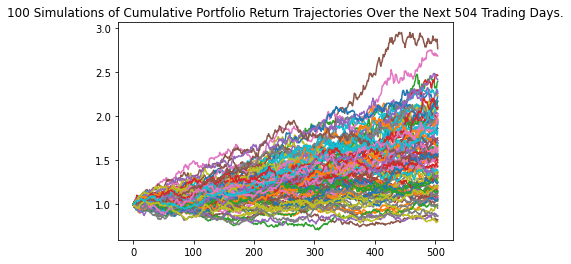

In [18]:
MC_yrs_sim.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 100 Simulations'}, ylabel='Frequency'>

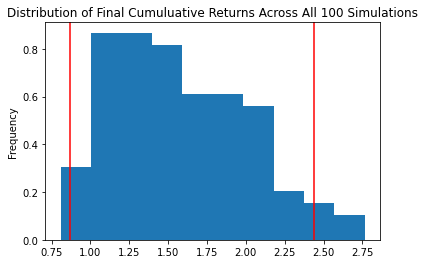

In [15]:
MC_yrs_sim.plot_distribution()

In [16]:
initial_investment=10000
summary_ret = MC_yrs_sim.summarize_cumulative_return()
summary_ret

count           100.000000
mean              1.582104
std               0.442291
min               0.807111
25%               1.215144
50%               1.551677
75%               1.923783
max               2.766203
95% CI Lower      0.868583
95% CI Upper      2.441270
Name: 504, dtype: float64

In [17]:
ci_lower_ten_cumulative_return = summary_ret[8] * initial_investment
ci_upper_ten_cumulative_return = summary_ret[9] * initial_investment

# Print the result of your calculations
print(f"Using 95% Confidence Intervals, a current investment of {initial_investment:,.02f} would return from ${ci_lower_ten_cumulative_return:,.02f} to ${ci_upper_ten_cumulative_return:,.02f}")


Using 95% Confidence Intervals, a current investment of 10,000.00 would return from $8,685.83 to $24,412.70
